# Ch05  Logistic回归

In [1]:
from numpy import *

### 训练算法：Logistic 回归梯度上升优化算法，找到最佳参数

In [8]:
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        # dataMat 中每个元素中个元素的意义是[X0, X1, X2],即[常数项，第一项， 第二项]
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        # labelMat 里面是数据的原始类别标签,即真实标签，我们目的就是让得到的回归系数尽可能使得运算结果等于这个标签
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def gradAscent(dataMatIn, classLabels):
    # 将数组转化为numpy矩阵
    dataMatrix = mat(dataMatIn)
    # 打印查看dataMatrix 的shape
    print dataMatrix.shape
    
    labelMat = mat(classLabels).transpose()
    # 打印查看 labelMat 的shape
    print 'The shape of labeMat is: (%s, %s)' % labelMat.shape
    
    m,n = shape(dataMatrix)
    # alpha 是向目标移动的步长
    alpha = 0.001
    # 迭代次数
    maxCycles = 500
    weights = ones((n, 1))
    for k in range(maxCycles):
        # h.shape = (m, 1)
        h = sigmoid(dataMatrix*weights)
        # 打印查看 h 的shape
        if k == 100:
            print 'The shape of h is: (%s, %s)' % h.shape
        
        # error.shape = (m, 1)
        error = (labelMat - h)
        # 打印查看 error 的shape
        if k == 200:
            print error.sha
        
        # w:=w + alpha × gradient更新回归系数的向量 梯度上升是‘+’，梯度下降是‘-’
        # dataMatrix.transpose()*error 的数学推导还不清楚,也就是说为什么这两数相乘之后是梯度？
        weights = weights + alpha * dataMatrix.transpose()*error
    return weights

__dataMatrix.transpose()*error 的数学推导还不清楚,也就是说为什么这两数相乘之后是梯度？__

In [10]:
dataArr, labelMat = loadDataSet()
gradAscent(dataArr, labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

### 分析数据：画出决策边界，即画出数据集和Logistic回归最佳拟合直线的函数

In [20]:
def plotBestFit(wei):
    import matplotlib.pyplot as plt
    # getA()是matrix 的一种方法，用来把矩阵转化为普通np数组
    weights = wei.getA()
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    # 将数据点分类
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1]); ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1]); ycord2.append(dataArr[i, 2])
    # plt.figure()大概清楚意思，创造一个新的figure
    fig = plt.figure()
    # fig.add_subblot 不熟悉
    ax = fig.add_subplot(111)
    # scatter 完全不熟
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    # 最佳拟合直线，弄懂
    y = (-weights[0] - weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

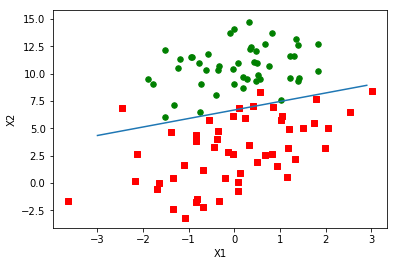

In [21]:
wei = matrix([[ 4.12414349],
              [ 0.48007329],
              [-0.6168482 ]])
plotBestFit(wei)

### 训练算法：随机梯度上升
 * 一次仅用一个样本点来更新回归系数，该方法称为__随机梯度上升算法__。
 * 由于可以在新样本到来时对分类器进行增量式更新，因而随机梯度上升算法是一个__在线学习算法__。
 * 与“在线学习”相对应，一次处理所有数据被称作是“批处理”。

In [22]:
# 随机梯度上升算法
def stocGradAscent0(dataMatrix, classLabels):
    m, n = shape(dataMatrix)
    # alpha 的值是固定的
    alpha = 0.01
    # 所有回归系数初始化为1，即迭代从1开始
    weights = ones(n)
    # 迭代次数由原来的500次变为数据的行数m
    for i in range(m):
        # 这里的 h 与之前先比已经变成了数值，而不再是向量
        h = sigmoid(sum(dataMatrix[i]*weights))
        # error 也是数值了
        error = classLabels[i] - h 
        weights = weights + alpha * error * dataMatrix[i]
    return weights

In [26]:
def plotBestFit1(wei):
    import matplotlib.pyplot as plt
    # getA()函数没见过，查清楚
    # weights = wei.getA()
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    # 将数据点分类
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1]); ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1]); ycord2.append(dataArr[i, 2])
    # plt.figure()大概清楚意思，不是很确定，查
    fig = plt.figure()
    # fig.add_subblot 不熟悉
    ax = fig.add_subplot(111)
    # scatter 完全不熟
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    # 最佳拟合直线，弄懂
    y = (-weights[0] - weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

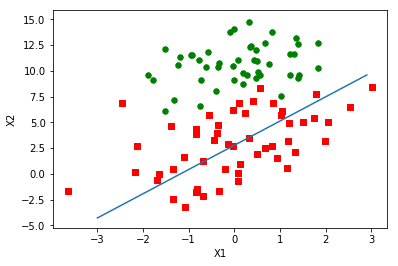

In [27]:
dataMat, labelMat = loadDataSet()
weights = stocGradAscent0(array(dataArr), labelMat)
plotBestFit1(weights)

### 改进的随机梯度上升算法
 * 对于一些特殊场景的问题的解决和改进
 * alpha 实现了每次迭代都动态减少
 * 随机选取样本更新

In [28]:
# 这种改进的目的是什么没看懂
# 算法增加了一个迭代次数作为第3个参数。如果该参数没有给定的话，算法将默认迭代150次。
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            # alpha 实现了每次迭代都动态减少
            alpha = 4/(1.0+j+i)+0.0001
            # 随机选取样本更新
            randIndex = int(random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

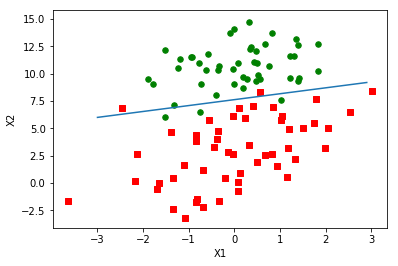

In [30]:
dataArr, labelMat = loadDataSet()
weights = stocGradAscent1(array(dataArr), labelMat)
plotBestFit1(weights)

##  示例：从疝气病症预测病马的死亡率
 * (1) 收集数据：给定数据文件。
 * (2) 准备数据：__用Python解析文本文件并填充缺失值。__
 * (3) 分析数据：__可视化并观察数据。__
 * (4) 训练算法：使用优化算法，找到最佳的系数。
 * (5) 测试算法：为了量化回归的效果，需要观察错误率。根据错误率决定是否回退到训练阶段，通过改变迭代的次数和步长等参数来得到更好的回归系数。
 * (6) 使用算法：实现一个简单的命令行程序来收集马的症状并输出预测结果并非难事，这可以做为留给读者的一道习题。

*该数据还存在一个问题，__数据集中有30%的值是缺失的。下面将首先介绍如何处理数据集中的数据缺失问题__，然后再利用Logistic回归和随机梯度上升算法来预测病马的生死。

### 准备数据：处理有缺失值的数据的一些可先办法
 * 使用可用特征的均值来填补缺失值；
 * 使用特殊值来填补缺失值，如-1；
 * 忽略有缺失值的样本；
 * 使用相似样本的均值添补缺失值；
 * 使用另外的机器学习算法预测缺失值。

针对书中的数据，作者做出了如下处理，并给出了解释；
 * 选择实数0来替换所有缺失值
   * 首先NumPy数据类型不允许包含缺失值；
   * 在更新时不会影响系数的值；
   * 由于sigmoid(0)=0.5，即它对结果的预测不具有任何倾向性，因此上述做法也不会对误差项造成任何影响。
 * 如果在测试数据集中发现了一条数据的类别标签已经缺失，那么我们的简单做法是将该条数据丢弃。
   * 因为类别标签与特征不同，很难确定采用某个合适的值来替换。

### 测试算法：用 Logistic 回归进行分类

In [34]:
# Logistic回归分类函数
def classidfyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0
    
def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    traiWeights = stocGradAscent1(array(trainingSet), trainingLabels, 500)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classidfyVector(array(lineArr), traiWeights)) != int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print 'the error rate of this test is: %f' % errorRate
    return errorRate

# 调用函数colicTest()10次并求结果的平均值。
def multiTest():
    numTests = 10; errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print 'after %d iterations the average error rate \
    is: %f' % (numTests, errorSum/float(numTests))

In [35]:
multiTest()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


the error rate of this test is: 0.313433
the error rate of this test is: 0.313433
the error rate of this test is: 0.328358
the error rate of this test is: 0.343284
the error rate of this test is: 0.432836
the error rate of this test is: 0.373134
the error rate of this test is: 0.373134
the error rate of this test is: 0.417910
the error rate of this test is: 0.298507
the error rate of this test is: 0.298507
after 10 iterations the average error rate     is: 0.349254


__机器学习的一个重要问题就是如何处理缺失数据。这个问题没有标准答案，取决于实际应用中的需求。现有一些解决方案，每种方案都各有优缺点。__